In [57]:
import tensorflow as tf
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import numpy as np
import matplotlib.pyplot as plt
## Building a deep neural network
def build_model(units, input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units, activation='sigmoid', use_bias=True, bias_initializer='zeros', input_shape=(input_dim,)),
        tf.keras.layers.Dense(units=units-1, activation='relu')])
    return model

model = build_model(3,2)
model_output= model(tf.constant([[1,2.]], shape=(1,2))).numpy()
print(model_output)

[[0.7213212 0.       ]]


tf.Tensor(56.0, shape=(), dtype=float32)
Initializing x=[0.0469774]


Text(0, 0.5, 'p value')

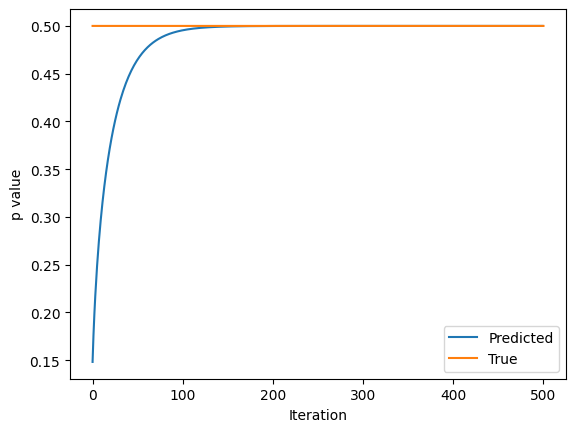

In [69]:
## Computing loss

# Gradient Descent

x= tf.Variable(4.0)

with tf.GradientTape() as tape:
    y = x**3 + x**2
    
dy_dx = tape.gradient(y, x)

print(dy_dx)

p = tf.Variable(tf.random.uniform([1], minval=0, maxval=1))
print("Initializing x={}".format(p.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []

y = 0.5

for i in range(500):
    with tf.GradientTape() as tape:
        loss = - (y * tf.math.log(p) + (1 - y) * tf.math.log(1 - p))
    grad = tape.gradient(loss, p)
    new_p = p - learning_rate*grad
    p.assign(new_p)
    history.append(p.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[y,p])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('p value')

In [72]:
## RNN
import functools
from IPython import display as ipythondisplay
from tqdm import tqdm
from scipy.io.wavfile import write
import mitdeeplearning as mdl

In [73]:
songs = mdl.lab1.load_training_data()

Found 817 songs in text


In [74]:
example_song = songs[0]
print(example_song)

X:1
T:Alexander's
Z: id:dc-hornpipe-1
M:C|
L:1/8
K:D Major
(3ABc|dAFA DFAd|fdcd FAdf|gfge fefd|(3efe (3dcB A2 (3ABc|!
dAFA DFAd|fdcd FAdf|gfge fefd|(3efe dc d2:|!
AG|FAdA FAdA|GBdB GBdB|Acec Acec|dfaf gecA|!
FAdA FAdA|GBdB GBdB|Aceg fefd|(3efe dc d2:|!


In [91]:
## Embedding: transform language into a numerical vector of fixed size since neural networks cannot intepret words

# First joining all the songs into a single string
songs_joined = "\n\n".join(songs)
# Then we need to find all the unique characters in the string by removing duplicates and sort the characters
vocab = sorted(set(songs_joined))
print(len(vocab))

# Create a mapping from characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
for i, u in zip(char2idx, range(10)):
    print(" {} - {}".format(repr(i), u))

83
 '\n' - 0
 ' ' - 1
 '!' - 2
 '"' - 3
 '#' - 4
 "'" - 5
 '(' - 6
 ')' - 7
 ',' - 8
 '-' - 9






In [104]:
# Create a mapping from indices to characters
idx2char = np.array(vocab)
for i, _ in zip(idx2char, range(10)):
    print("{}".format(repr(i)))

'\n'
' '
'!'
'"'
'#'
"'"
'('
')'
','
'-'


In [105]:
# Vectorize the songs string

def vectorize_string(string):
    vectorize_output = np.array([char2idx[char] for char in string])
    return vectorize_output

vectorize_songs = vectorize_string(songs_joined)

In [115]:
for i, _ in zip(vectorize_songs, range(10)):
    print("{} - {}".format(repr(i), repr(songs_joined[_])))

49 - 'X'
22 - ':'
13 - '1'
0 - '\n'
45 - 'T'
22 - ':'
26 - 'A'
67 - 'l'
60 - 'e'
79 - 'x'
